In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/Iris.csv")
df

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


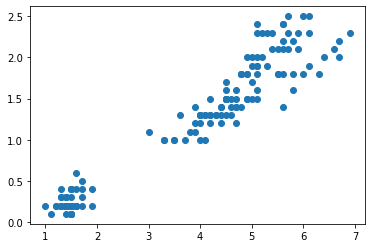

In [3]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

In [9]:
km = KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [10]:
y_predicted=km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [11]:
df['Cluster']=y_predicted
df

,Id,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,1.4,0.2,Iris-setosa,1
1,2,1.4,0.2,Iris-setosa,1
2,3,1.3,0.2,Iris-setosa,1
3,4,1.5,0.2,Iris-setosa,1
4,5,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...
145,146,5.2,2.3,Iris-virginica,0
146,147,5.0,1.9,Iris-virginica,2
147,148,5.2,2.0,Iris-virginica,0
148,149,5.4,2.3,Iris-virginica,0


In [12]:
km.cluster_centers_

array([[5.78611111, 2.10833333],
       [1.464     , 0.244     ],
       [4.75789474, 1.59736842],
       [3.90384615, 1.19230769]])

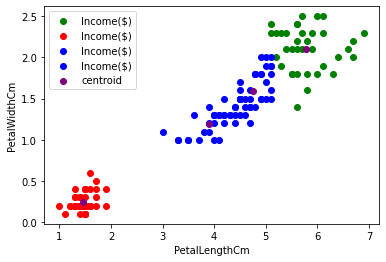

In [16]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1.PetalLengthCm,df1['PetalWidthCm'],color="green",label='Income($)')
plt.scatter(df2.PetalLengthCm,df2['PetalWidthCm'],color="red",label='Income($)')
plt.scatter(df3.PetalLengthCm,df3['PetalWidthCm'],color="blue",label='Income($)')
plt.scatter(df4.PetalLengthCm,df4['PetalWidthCm'],color="blue",label='Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',label='centroid')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [17]:
k_rng= range(1,10)
sse=[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

In [18]:
sse

[550.6434666666669,
 86.40394533571003,
 31.38775897435897,
 19.493523363965473,
 13.933308757908755,
 11.056639971910453,
 9.25850873015873,
 7.640593062579722,
 6.496659206692712]

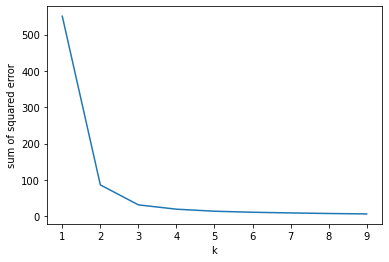

In [19]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)